# Basic MLP (PyTorch)

In [1]:
%pylab inline
import torch

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=loadtxt('2cl_spiral.txt')
y_train, x_train = data[:,0].astype(uint8), data[:,1:]
x_train-=x_train.min(axis=0)
x_train/=x_train.max(axis=0)
x_train=torch.as_tensor(x_train, dtype=torch.float)
y_train=torch.as_tensor(y_train, dtype=torch.long)
x_train=2*x_train-1

In [3]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.Tanh(),
    torch.nn.Linear(10, 5),
    torch.nn.Tanh(),
    torch.nn.Linear(5, 2),
    torch.nn.Softmax(dim=1)
)

In [4]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [5]:
for t in range(2000):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)

    if not t % 200:
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 0.7080144286155701
200 0.5994592905044556
400 0.4964878559112549
600 0.4190821945667267
800 0.3405633866786957
1000 0.32135292887687683
1200 0.31650644540786743
1400 0.31488269567489624
1600 0.3142383396625519
1800 0.3139220178127289


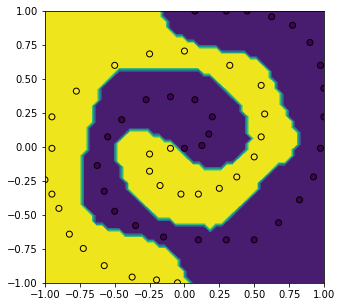

In [6]:
n=50 # rozdzielczość
x = y = linspace(-1,1,num=n)
bb=ones((n,n))
xx, yy = np.meshgrid(x, y)
z=model(torch.as_tensor(transpose([yy,xx]), dtype=torch.float)).argmax(dim=-1)
figsize(5,5)
contourf(xx,yy,z, vmin=0, vmax=max(y_train));
scatter(x_train[:,0], x_train[:,1],c=y_train, edgecolors=(0,0,0))